In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [81]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [82]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [83]:
data.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [84]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [85]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [86]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [87]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [88]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [89]:
X.shape

(299, 12)

In [90]:
Y.shape

(299,)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [93]:
scaler.fit(X) #maen and std

StandardScaler()

In [94]:
x_scaled=scaler.transform(X)

In [95]:
x_scaled

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [96]:
from sklearn.model_selection import train_test_split
X_trainS,X_testS,Y_trainS,Y_testS = train_test_split(x_scaled,Y,test_size=0.20,random_state=111)

In [97]:
from sklearn.linear_model import LogisticRegression
lrS=LogisticRegression()
lr_modelS=lrS.fit(X_trainS,Y_trainS)

In [98]:
lr_predS=lr_modelS.predict(X_testS)

In [99]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
reportS=classification_report(Y_testS,lr_predS)
print(reportS)
print(accuracy_score(Y_testS,lr_predS))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.95      0.78      0.86        23

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60

0.9


In [100]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt=DecisionTreeClassifier()

In [102]:
dt2=dt.fit(X_trainS,Y_trainS)

In [103]:
dt_predS=dt2.predict(X_testS)

In [104]:
dt_predS

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [105]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
reportd=classification_report(Y_testS,dt_predS)
print(reportd)
print(accuracy_score(Y_testS,dt_predS))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.77      0.74      0.76        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

0.8166666666666667


In [106]:
from sklearn.svm import SVC


In [107]:
sv=SVC()

In [108]:
sv2=sv.fit(X_trainS,Y_trainS)

In [109]:
sv_predS=sv2.predict(X_testS)

In [110]:
sv_predS

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [111]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report_sv=classification_report(Y_testS,sv_predS)
print(report_sv)
print(accuracy_score(Y_testS,sv_predS))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        37
           1       0.87      0.57      0.68        23

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.77        60
weighted avg       0.81      0.80      0.79        60

0.8


In [112]:
from sklearn.ensemble import RandomForestClassifier


In [113]:
rd=RandomForestClassifier()

In [114]:
rd2=rd.fit(X_trainS,Y_trainS)

In [115]:
rd_predS=rd2.predict(X_testS)

In [116]:
rd_predS

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [117]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report_rd=classification_report(Y_testS,rd_predS)
print(report_rd)
print(accuracy_score(Y_testS,rd_predS))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.95      0.78      0.86        23

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60

0.9


In [118]:
#new_input = [[56],[0],[678],[1],[38],[1],[260000],[1.8],[135],[1],[1],[5]]
#new_input1 = [[56,1,678,1,38,1,260000,1.8,135,0,0,5]]

In [119]:
#new_output = rd2.predict(new_input1)

In [120]:
#print(new_output)

In [121]:
#new_again=[[75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4]]

In [122]:
#new_output_again=rd2.predict(new_again)

In [123]:
#print(new_output_again)

In [124]:
input_data=(75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4)

In [125]:
#change the input data
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=rd2.predict(input_data_reshaped)
print(prediction)

[0]


In [126]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
gb=GradientBoostingClassifier(learning_rate=0.2,max_depth=1,n_estimators=10,random_state=121)

In [128]:
gb2=gb.fit(X_trainS,Y_trainS)

In [129]:
gb_predS=gb2.predict(X_testS)

In [130]:
gb_predS

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [131]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report_gb=classification_report(Y_testS,gb_predS)
print(report_gb)
print(accuracy_score(Y_testS,gb_predS))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.86      0.83      0.84        23

    accuracy                           0.88        60
   macro avg       0.88      0.87      0.88        60
weighted avg       0.88      0.88      0.88        60

0.8833333333333333


In [132]:
gb_conf=confusion_matrix(Y_testS,gb_predS)
print(gb_conf)

[[34  3]
 [ 4 19]]


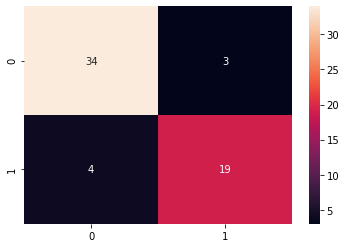

In [133]:
import seaborn as sns
sns.heatmap(gb_conf,annot=True)

In [134]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [135]:
#Stacking
from sklearn.ensemble import RandomForestClassifier
algo=[('decisionTree',DecisionTreeClassifier()),('randomForest',RandomForestClassifier(random_state=111,n_estimators=10))]
st=StackingClassifier(estimators=algo,final_estimator=LogisticRegression())

In [136]:
st2=st.fit(X_trainS,Y_trainS)

In [137]:
st_predS=st2.predict(X_testS)

In [138]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report_st=classification_report(Y_testS,st_predS)
print(report_st)
print(accuracy_score(Y_testS,st_predS))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.83      0.83      0.83        23

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

0.8666666666666667


In [139]:
st_conf=confusion_matrix(Y_testS,st_predS)
print(st_conf)

[[33  4]
 [ 4 19]]


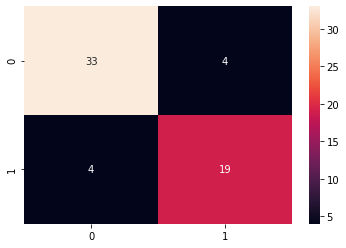

In [140]:
import seaborn as sns
sns.heatmap(st_conf,annot=True)

In [141]:
from sklearn.ensemble import BaggingClassifier

In [142]:
bg=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,random_state=122)

In [143]:
bg2=bg.fit(X_trainS,Y_trainS)

In [144]:
bg_predS=bg2.predict(X_testS)

In [145]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report_bg=classification_report(Y_testS,bg_predS)
print(report_bg)
print(accuracy_score(Y_testS,bg_predS))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.76      0.70      0.73        23

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.80      0.80      0.80        60

0.8


In [146]:
bg_conf=confusion_matrix(Y_testS,bg_predS)
print(bg_conf)

[[32  5]
 [ 7 16]]


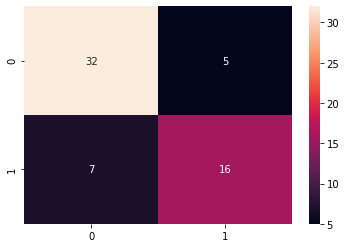

In [147]:
import seaborn as sns
sns.heatmap(bg_conf,annot=True)

In [148]:
bg_again=BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10,random_state=122)

In [149]:
bg_again2=bg_again.fit(X_trainS,Y_trainS)

In [150]:
bg_again_predS=bg_again2.predict(X_testS)

In [151]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report_bg_again=classification_report(Y_testS,bg_again_predS)
print(report_bg_again)
print(accuracy_score(Y_testS,bg_again_predS))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.94      0.74      0.83        23

    accuracy                           0.88        60
   macro avg       0.90      0.86      0.87        60
weighted avg       0.89      0.88      0.88        60

0.8833333333333333


In [152]:
bg_again_conf=confusion_matrix(Y_testS,st_predS)
print(bg_again_conf)

[[33  4]
 [ 4 19]]


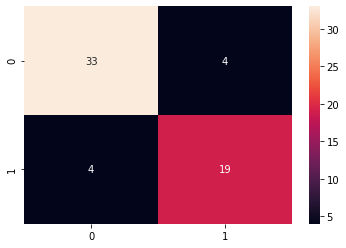

In [153]:
import seaborn as sns
sns.heatmap(bg_again_conf,annot=True)

## Boxplot

In [181]:
x = data['anaemia']
x

0      0
1      0
2      0
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: anaemia, Length: 299, dtype: int64

In [182]:
y = data['platelets']
y

0      265000.00
1      263358.03
2      162000.00
3      210000.00
4      327000.00
         ...    
294    155000.00
295    270000.00
296    742000.00
297    140000.00
298    395000.00
Name: platelets, Length: 299, dtype: float64

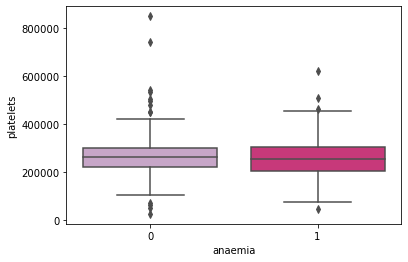

In [183]:

sns.boxplot(x,y,data=data,palette='PuRd')